<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#State-of-the-art" data-toc-modified-id="State-of-the-art-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>State of the art</a></span><ul class="toc-item"><li><span><a href="#Point-Cloud-Methods" data-toc-modified-id="Point-Cloud-Methods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Point Cloud Methods</a></span></li></ul></li><li><span><a href="#Taxonomy-of-point-based-methods-for-semantic-segmentation" data-toc-modified-id="Taxonomy-of-point-based-methods-for-semantic-segmentation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Taxonomy of point based methods for semantic segmentation</a></span></li><li><span><a href="#3D-scene-semantic-segmentation-using-pointnet-in-pytorch" data-toc-modified-id="3D-scene-semantic-segmentation-using-pointnet-in-pytorch-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3D scene semantic segmentation using pointnet in pytorch</a></span></li><li><span><a href="#Dataset-(S3DIS)" data-toc-modified-id="Dataset-(S3DIS)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dataset (S3DIS)</a></span></li><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preparing the data</a></span></li></ul></div>

# Introduction

Point clouds are the simplest representation of an object. It can be generated using:
 * LIDAR
 * Infrared
 * Stereo
 
Many challenges like: resolution, occlusion and noise

Unlike the images, pointcloud is an unordered set of points and convolution cannot be applied

# State of the art

Recently, a lot of effort has been put into bridging the success from 2D scene
understanding into the 3D world. 

* **Voxelized Methods:** The straightforward approach of applying CNNs in the 3D space is implemented by preprocessing the point cloud into a voxel representation first in order to apply 3D convolutions on that new representation. However 3D convolutions have drawbacks. Memory and computational time grows cubicly on the number of voxels, restricting approaches to use coarse voxels grids. However, by doing so, one then introduces discretization artifacts (especially for thin structures) and loose geometric information such as point density. 

* **Point Cloud Methods:** Methods directly operating on the point cloud representation produce promising results. Point cloud methods are a class of approaches that directly process unstructured 3D point clouds, rather than voxelizing or projecting them onto a regular grid. One of the most influential methods in this group is PointNet, which introduced the idea of extracting point features using a sequence of MLPs processing the points individually, followed by a max-pooling operation that describes the points globally. 

    Subsequent methods have built on this approach by partitioning the point cloud space in more meaningful ways, such as using octrees or kd-trees. Others have incorporated local geometry and surface information into the feature extraction process through clustering, hierarchical grouping of points, or graph neural networks.

    The advantage of point cloud methods is that they can preserve the original spatial structure of the data without the need for voxelization or projection. This allows for more accurate representation of the underlying geometry and better preservation of fine-grained details. However, point cloud methods can be more computationally expensive due to the lack of structure and the need for additional processing steps to group nearby points and extract features.
    
## Point Cloud Methods 

3D point cloud segmentation is the process of classifying point clouds into different homogeneous regions such that the points in the same isolated and meaningful region have similar properties. 3D segmentation is a challenging task because of high redundancy, uneven sampling density, and lack of explicit structure of point cloud data. The segmentation of point clouds into foreground and background is a fundamental step in processing 3D point clouds.

3D point cloud segmentation can be deployed at 

1. **scene level (semantic segmentation)**
2. **object-level (instance segmentation)**
3. **part level (part segmentation)**

Semantic segmentation is a technique that detects for each pixel, the object category that it belongs to and also treats multiple objects of the same class as a single entity.

# Taxonomy of point based methods for semantic segmentation

![taxonomy](images/taxonomy.png)

The taxonomy for various point-based 3D semantic segmentation techniques can be given by 4 paradigms as 

    (a) Point-wise MLP
    (b) Point Convolution
    (c) RNN-based
    (d) Graph-based.



# 3D scene semantic segmentation using pointnet in pytorch

* Install PyTorch: The first step is to install PyTorch, which is a popular deep learning library that includes support for 3D data. You can follow the installation instructions provided on the PyTorch website to install the library.

* Install other necessary packages: Depending on the specific requirements of your project, you may need to install other packages such as NumPy, Open3D, and PyVista. These packages can help you work with 3D data and perform various preprocessing steps.

* Load and preprocess data: Once you have installed the necessary packages, you can start loading and preprocessing your 3D data. This might involve converting point cloud data into a format that can be used by PointNet, as well as performing other preprocessing steps such as normalization or data augmentation.

* Implement PointNet: Next, you can start implementing the PointNet model in PyTorch. You can find the original PointNet implementation on the GitHub repository of the author, or you can find pre-existing implementations on other open-source repositories. You can then modify the code to suit your specific requirements and integrate it with your data loading and preprocessing code.

* Train the model: Once you have implemented the PointNet model, you can start training it on your data. You will need to specify a loss function, an optimizer, and other hyperparameters, as well as define a training loop that iteratively updates the model weights based on the training data.

* Evaluate the model: After training the model, you can evaluate its performance on a separate validation set or test set. This can involve computing various metrics such as accuracy, precision, recall, and F1 score.

* Fine-tune the model: Depending on the results of your evaluation, you may need to fine-tune the model by adjusting hyperparameters, changing the architecture, or performing other optimizations.

# Dataset (S3DIS)



In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convert_line(line):
    return [float(x) for x in line.split()]
    
with open("dataset/Stanford3dDataset_v1.2/Area_1/office_1/Annotations/chair_1.txt") as f:
    lines = f.readlines()
converted = [convert_line(x) for x in lines]

<IPython.core.display.Javascript object>


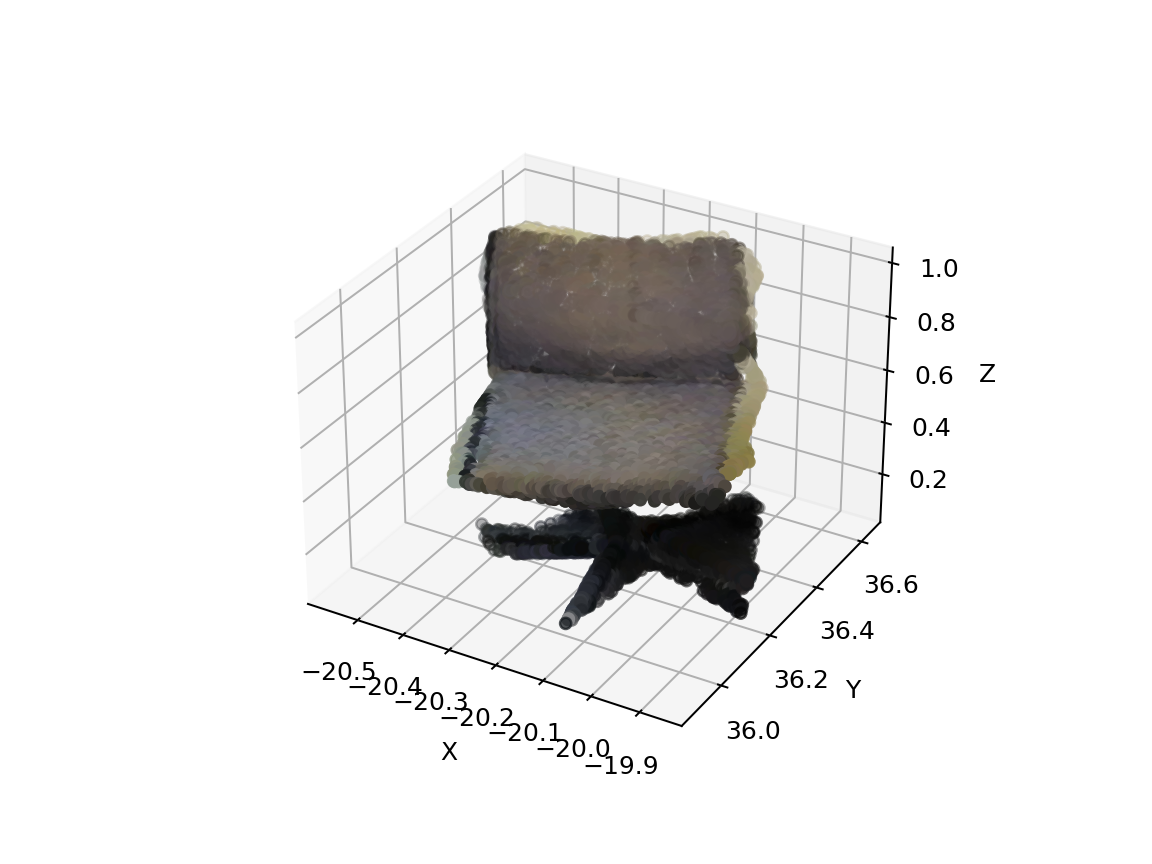

In [3]:
%matplotlib notebook
# Convert the point clouds to separate lists for x, y, z, r, g, b
x, y, z, r, g, b = zip(*converted)

# Create a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection="3d")

# Scale the RGB values to the range 0-1
scaled_rgb = [(r_val/255, g_val/255, b_val/255) for r_val, g_val, b_val in zip(r, g, b)]

ax.scatter(x, y, z, c=scaled_rgb)

# Set the labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

# Preparing the data

The data is prepared in the format XYZRGBL where L is the label taken for the filenames in the annotations folder

![dataset](images/dataset.png)

In [5]:
import glob
import os

DATASET_DIR = 'dataset/Stanford3dDataset_v1.2'
folders = glob.glob(DATASET_DIR + '/*', recursive = True)
print(folders)

['dataset/Stanford3dDataset_v1.2/Area_1', 'dataset/Stanford3dDataset_v1.2/Area_5', 'dataset/Stanford3dDataset_v1.2/Area_6', 'dataset/Stanford3dDataset_v1.2/Area_4', 'dataset/Stanford3dDataset_v1.2/Area_2', 'dataset/Stanford3dDataset_v1.2/Area_3']


In [7]:
class_names = []
with open('dataset/Stanford3dDataset_v1.2/class_names.txt') as f:
    lines = f.readlines()
    for line in lines:
        class_names.append(line.split()[0])
print(class_names)

['ceiling', 'floor', 'wall', 'beam', 'column', 'window', 'door', 'table', 'chair', 'sofa', 'bookcase', 'board', 'clutter']


In [12]:
def convert_line(line, label):
    elements = line.split()
    try:
        values = [float(e) for e in elements]
        return values + [label]
    except ValueError:
        return None

for areas in folders:
    pointcloud_val = []
    data = glob.glob(areas + '/*')
    for file_path in data:
        print(file_path)
        annota = glob.glob(file_path + '/Annotations' + '/*.txt')
        pointcloud = []
        for files in annota:
            filename = os.path.basename(files)
            class_extracted = filename.split('.')[0].split('_')[0]
            label = class_names.index(class_extracted)
            with open(files) as f:
                lines = f.readlines()
                pointcloud += [convert_line(x, label) for x in lines if convert_line(x, label) is not None]
        my_array = np.array(pointcloud)
        print(" the length of the files is", my_array.shape)
        print('saving to file', areas, file_path)
        np.save('{}_{}.npy'.format(areas, os.path.basename(file_path)), my_array)

dataset/Stanford3dDataset_v1.2/Area_5/hallway_1
 the length of the files is (3361173, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/hallway_1
dataset/Stanford3dDataset_v1.2/Area_5/office_33
 the length of the files is (852519, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_33
dataset/Stanford3dDataset_v1.2/Area_5/office_39
 the length of the files is (928712, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_39
dataset/Stanford3dDataset_v1.2/Area_5/office_16
 the length of the files is (745900, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_16
dataset/Stanford3dDataset_v1.2/Area_5/office_32
 the length of the files is (809428, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_32
dataset/Stanford3dDataset_v1.2/Area_5/office_42
 the l

 the length of the files is (685639, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/storage_4
dataset/Stanford3dDataset_v1.2/Area_5/office_28
 the length of the files is (777028, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_28
dataset/Stanford3dDataset_v1.2/Area_5/office_40
 the length of the files is (2495982, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_40
dataset/Stanford3dDataset_v1.2/Area_5/office_7
 the length of the files is (821442, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_7
dataset/Stanford3dDataset_v1.2/Area_5/office_37
 the length of the files is (2575390, 7)
saving to file dataset/Stanford3dDataset_v1.2/Area_5 dataset/Stanford3dDataset_v1.2/Area_5/office_37
dataset/Stanford3dDataset_v1.2/Area_5/office_36
 the length of the files is (1301245, 7)
saving to file

In [15]:
# Load the data from the .npy file
data = np.load('dataset/Stanford3dDataset_v1.2/extracted_dataset/Area_1/Area_1_conferenceRoom_1.npy', allow_pickle=True)

# Print the data
print(data.shape)
print(data)

(1136617, 7)
[[-20.373  38.658   0.538 ... 160.    145.      8.   ]
 [-20.363  38.669   0.521 ... 102.    102.      8.   ]
 [-20.342  38.676   0.503 ...  98.    106.      8.   ]
 ...
 [-18.35   38.727   0.466 ...  23.     18.      7.   ]
 [-18.344  38.731   0.447 ...  24.     19.      7.   ]
 [-18.352  38.735   0.486 ...  26.     21.      7.   ]]
